In [1]:
import pandas as pd
from sklearn import preprocessing
from numpy import *
import math

In [2]:
df1 = pd.read_csv('./table1.txt', sep='\t', 
                  header=None, 
                 # dtype=np.float64
                 )
df2 = pd.read_csv('./table2.txt', 
                  sep='\t', 
                  header=None
                 )

In [3]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)

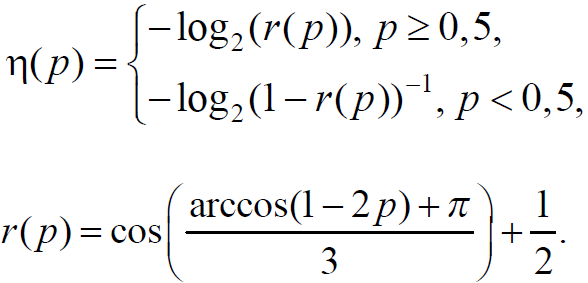

In [4]:
def rp(p):
    return cos((arccos(1 - 2 * p) + pi) / 3) + 0.5

def np(p):
    if (p < 0.5): 
        return -1/(log(1 - rp(p))/log(2))
    else:
        return -(log(rp(p))/log(2))

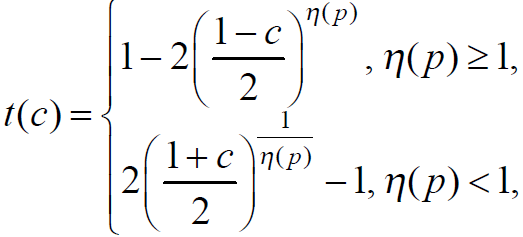

In [5]:
def Tc(c, i, j, np):
    if (np[i][j] < 1):
        return 2 * pow(((1 + c) / 2), 1/ np[i][j]) - 1
    else:
        return 1 - 2 * pow(((1 - c) / 2), np[i][j]);

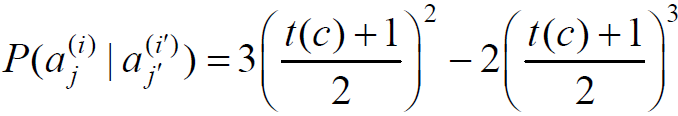

In [6]:
def Paa(tc):
    return (3 * pow((tc + 1) / 2, 2) - pow(tc + 1, 3) / 4)

### Part1

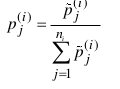

In [7]:
df1_p_ = df1.div(df1.sum(axis=0), axis=1)

In [8]:
df1_np = df1_p_.applymap(lambda p: np(p))
df1_np

/home/denys/classifieds/venv/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


,0,1,2,3
0,0.327434,0.482720,0.606200,0.630930
1,0.657950,1.000000,1.039004,1.191152
2,1.039004,0.665480,0.555503,0.489574
3,0.504802,0.382713,0.327434,0.000000


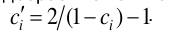

In [9]:
# c-calculate
df2_c_ = df2.applymap(lambda c: (2/(1-c))-1)
df2_c_

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.000000,1.000000,0.538462,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
1,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
2,0.333333,1.857143,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
3,0.052632,0.333333,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
4,1.500000,1.000000,0.818182,0.666667,2.333333,1.000000,0.666667,0.176471,1.000000,1.0,1.0,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.500000,1.500000,1.000000,0.428571,1.000000,1.0,1.0,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
7,0.428571,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.857143,1.000000,1.0,1.0,1.000000
8,0.333333,1.000000,1.857143,3.000000,0.538462,0.818182,1.857143,4.000000,0.666667,1.0,1.0,1.500000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.0,1.0,1.000000


In [10]:
c_calculate = ones((4,4,4,4))

In [11]:
# 2 1
c_calculate[1][0][0][0] = 3;
c_calculate[1][0][0][2] = 0.538462;
c_calculate[1][0][0][3] = 0.25;

# 2 2
c_calculate[1][1][0][1] = 3;

# 2 3

c_calculate[1][2][0][0] = 0.333;
c_calculate[1][2][0][1] = 1.857;
c_calculate[1][2][0][2] = 3;

# 2 4

c_calculate[1][3][0][0] = 0.052;
c_calculate[1][3][0][1] = 0.333;
c_calculate[1][3][0][2] = 0.667;


# 3 1

c_calculate[2][0][0][0] = 1.5;
c_calculate[2][0][0][2] = 0.81
c_calculate[2][0][0][3] = 0.667;
c_calculate[2][0][1][0] = 2.33;
c_calculate[2][0][1][2] = 0.667;
c_calculate[2][0][1][3] = 0.17;


# 3 2

c_calculate[2][1][1][0] = 1.5;
c_calculate[2][1][1][1] = 1.5;
c_calculate[2][1][1][3] = 0.43;

# 3 3

# 3 4

c_calculate[2][3][0][0] = 0.428571 
c_calculate[2][3][0][2] = 0.666667
c_calculate[2][3][1][3] = 1.86;

# 4 1
c_calculate[3][0][0][0] = 0.33;
c_calculate[3][0][0][2] = 1.85;
c_calculate[3][0][0][3] = 3;

c_calculate[3][0][1][0] = 0.54;
c_calculate[3][0][1][1] = 0.81;
c_calculate[3][0][1][2] = 1.86;
c_calculate[3][0][1][3] = 4;

c_calculate[3][0][2][0] = 0.667;
c_calculate[3][0][2][3] = 1.5;

# 4 2
c_calculate[3][1][1][3] = 1.5;

# 4 3
c_calculate[3][2][0][0] = 3;
c_calculate[3][2][0][2] = 0.53;
c_calculate[3][2][0][3] = 0.33;

c_calculate[3][2][1][0] = 1.85;
c_calculate[3][2][1][1] = 1.2;
c_calculate[3][2][1][2] = 0.33;
c_calculate[3][2][1][3] = 0.25;

c_calculate[3][2][2][0] = 1.5;
c_calculate[3][2][2][3] = 0.66;

# 4 4

In [12]:
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            for l in range(0,4):
                        c_calculate[i][j][k][l] = c_calculate[k][l][i][j];

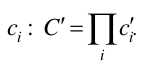

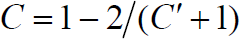


In [13]:
c_matrix = zeros((4,4,4,4,4))
p_matrix = zeros((4,4,4,4,4))

In [14]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                for i5 in range(0,4):
                    for i6 in range(0,4):
                        for i7 in range(0,4):
                            if (i1 == 0):
                                c_matrix[i1][i2][i3][i4][i5] = c_calculate[i1][i2][1][i3] * c_calculate[i1][i2][2][i4] * c_calculate[i1][i2][3][i5]
                            if (i1 == 1):
                                c_matrix[i1][i2][i3][i4][i5] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][2][i4] * c_calculate[i1][i2][3][i5] 
                            if (i1 == 2):
                                c_matrix[i1][i2][i3][i4][i5] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][1][i4] * c_calculate[i1][i2][3][i5] 
                            if (i1 == 3):
                                c_matrix[i1][i2][i3][i4][i5] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][1][i4] * c_calculate[i1][i2][2][i5] 

                            c_matrix[i1][i2][i3][i4][i5] = 1 - 2.0 / (c_matrix[i1][i2][i3][i4][i5] + 1)
                            tc = Tc(c_matrix[i1][i2][i3][i4][i5], i2, i1, df1_np.as_matrix())
                            p_matrix[i1][i2][i3][i4][i5] = Paa(tc)



/home/denys/classifieds/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


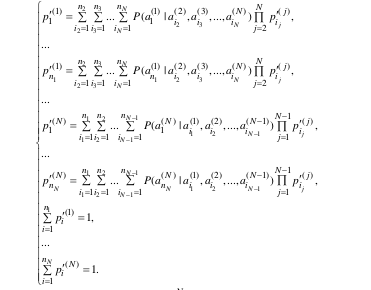

In [15]:
probability_x1 = zeros((4,4))
probability_x2 = zeros((4,4))

In [16]:
for n in range(0,10):
    for i in range(0,4):
        for j in range(0,4):
            for i3 in range(0,4):
                for i4 in range(0,4):
                    for i5 in range(0,4):
                        for i6 in range(0,4):
                            for i7 in range(0,4):
                                if (i == 0):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5] * df1_p_[i3][1] * df1_p_[i4][2] * df1_p_[i5][3] 
                                if (i == 1):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5] * df1_p_[i3][0] * df1_p_[i4][2] * df1_p_[i5][3] 
                                if (i == 2):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5] * df1_p_[i3][0] * df1_p_[i4][1] * df1_p_[i5][3] 
                                if (i == 3):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5] * df1_p_[i3][0] * df1_p_[i4][1] * df1_p_[i5][2] 
                              
    probability_x1[3][3] = 0;
    for i in range(0,4):
        sum = 0;
        for j in range(0,4):
            sum = sum + probability_x1[i][j];

        for j in range(0,4):
            probability_x2[j][i] = probability_x1[i][j] / sum;
            probability_x1[i][j] = 0;

In [17]:
probability_x2

array([[ 0.04876585,  0.10081278,  0.13437577,  0.44816711],
       [ 0.29436176,  0.43366648,  0.53606768,  0.49121163],
       [ 0.43348737,  0.37303433,  0.2188085 ,  0.06062126],
       [ 0.22338502,  0.09248642,  0.11074805,  0.        ]])

In [18]:
df1_p_.as_matrix()[:,0]

array([ 0.04,  0.28,  0.52,  0.16])

In [19]:
import matplotlib.pyplot as plt

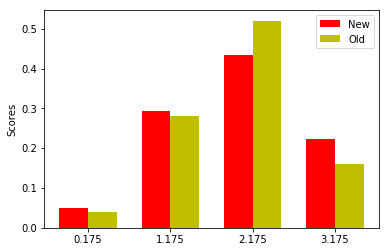

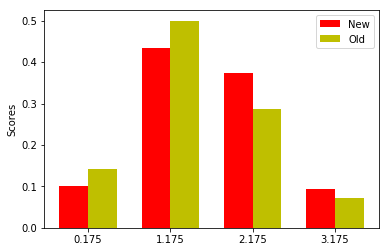

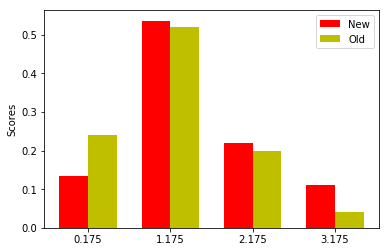

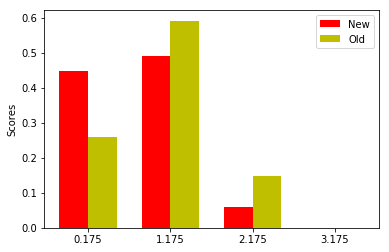

In [20]:
# ToDo подписать графики и значения на осях
for i in range(4):    
    N = 4
    new_means = probability_x2[:,i]

    ind = arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, new_means, width, color='r')

    old_means = df1_p_.as_matrix()[:,i]
    rects2 = ax.bar(ind + width, old_means, width, color='y')

    ax.set_ylabel('Scores')
    #ax.set_title('Напруженість в світі')
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(('Відносна стабільність', 
    #                     'Холодна війна', 
    #                     'Локальні конфлікти', 
    #                     'Локальні війни'))

    ax.legend((rects1[0], rects2[0]), ('New', 'Old'))

### Part 2 

In [21]:
df1 = pd.DataFrame(ones((4,4))/4)
df1_np = df1.applymap(lambda p: np(p))
df1_np

,0,1,2,3
0,0.619003,0.619003,0.619003,0.619003
1,0.619003,0.619003,0.619003,0.619003
2,0.619003,0.619003,0.619003,0.619003
3,0.619003,0.619003,0.619003,0.619003


In [22]:
table_3 = pd.read_csv('./table3.txt', sep='\t', 
                  header=None, 
                 # dtype=np.float64
                 )

In [23]:
table_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.2,-0.2,0.1,-0.1,0.4,0.2,0.0,0.0,0.0,0.0,0.0,-1,0.0,-0.2,-1,-1,-1,-1
1,0.1,0.0,0.2,0.3,0.5,0.2,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.2,-1,-1,-1,-1
2,0.3,0.2,0.3,0.2,0.3,0.1,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.4,-1,-1,-1,-1
3,0.4,0.5,0.5,0.4,0.3,0.2,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.6,-1,-1,-1,-1
4,0.2,-0.3,0.0,-0.4,0.2,0.1,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,-1,-1,-1,-1
5,0.3,0.0,0.0,-0.3,0.5,0.4,0.0,0.0,0.0,0.0,0.0,-1,0.4,0.0,-1,-1,-1,-1
6,0.4,0.4,0.3,0.0,0.6,0.6,0.0,0.0,0.0,0.0,0.0,-1,0.7,-0.2,-1,-1,-1,-1
7,0.5,0.8,0.6,0.8,0.7,0.7,0.0,0.0,0.0,0.0,0.0,-1,0.9,-0.5,-1,-1,-1,-1
8,0.0,0.2,0.5,0.5,0.3,0.4,0.5,0.4,0.7,0.6,0.6,-1,0.0,0.0,-1,-1,-1,-1
9,0.3,0.2,0.3,0.3,0.3,0.3,0.5,0.3,0.5,0.4,0.3,-1,0.0,0.1,-1,-1,-1,-1


In [24]:
second_level = zeros((4, 3, 6, 4))

In [25]:
i0 = lambda x: x//4
i1 = lambda x: x % 4
j0 = lambda x: x // 6
j1 = lambda x: x % 6

In [26]:
for i in range(16):
    for j in range(18):
        second_level[i0(i), j0(j), j1(j), i1(i)] = table_3.loc[i,j]

In [27]:
c_calculate2 = zeros((4, 3, 6, 4))

In [28]:
for i1 in range(0,4):
    for i2 in range(0,3):
        for i3 in range(0,6):
            for i4 in range(0,4):
                c_calculate2[i1][i2][i3][i4] = 2.0 / (1 - second_level[i1][i2][i3][i4]) - 1;

In [29]:
c_matrix2 = zeros((4,4,4,3,4,3,3,3))
p_matrix2 = zeros((4,4,4,3,4,3,3,3))

In [30]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,3):
                for i5 in range(0,4):
                    for i6 in range(0,3):
                        for i7 in range(0,3):
                            for i8 in range(0,3):
                                c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] = c_calculate2[0][i3][i1][i2] * c_calculate2[1][i4][i1][i2] * c_calculate2[2][i5][i1][i2] * c_calculate2[3][i6][i1][i2] 
                                tc = Tc(c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8], i1, i2, df1_np.as_matrix());
                                p_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] = Paa(tc);
                                    

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
probability2 = zeros((4,4))

In [ ]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,3):
                for i5 in range(0,4):
                    for i6 in range(0,3):
                        for i7 in range(0,3):
                            for i8 in range(0,3):
                                probability2[i1][i2] = probability2[i1][i2] + p_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] * probability_x2[i3][0] * probability_x2[i4][1] * probability_x2[i5][2] * probability_x2[i6][3]


for i in range(0,4):
    sum = 0;
    for j in range(0,4):
        sum = sum + probability2[i][j];
    for j in range(0,4):
        probability2[i][j] = probability2[i][j] / sum;

In [71]:
probability2 = pd.read_csv('./prob2.csv',  
                           header=None, dtype='float32').as_matrix()

In [72]:
probability2

array([[ 0.20689726,  0.23227198,  0.53729945],
       [ 0.12304742,  0.1715816 ,  0.46270055],
       [ 0.14228486,  0.22517686,  0.        ],
       [ 0.08588994,  0.1956469 ,  0.        ],
       [ 0.2270577 ,  0.17532267,  0.        ],
       [ 0.21482284,  0.        ,  0.        ]], dtype=float32)

In [73]:
probability2[:,2]

array([ 0.53729945,  0.46270055,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

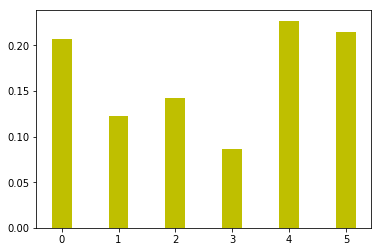

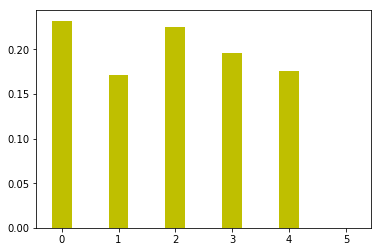

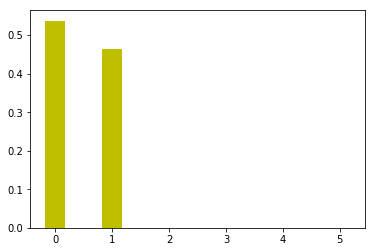

In [74]:
# ToDo подписать графики и значения на осях
for i in range(3):    
    N = 6
    new_means = probability2[:,i]

    ind = arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, new_means, width, color='y')

    #old_means = df1_p_.as_matrix()[:,i]
    #rects2 = ax.bar(ind + width, old_means, width, color='y')

    #ax.set_ylabel('Scores')
    #ax.set_title('Напруженість в світі')
    #ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(('Відносна стабільність', 
    #                     'Холодна війна', 
    #                     'Локальні конфлікти', 
    #                     'Локальні війни'))

    #ax.legend((rects1[0], rects2[0]), ('New', 'Old'))

### Part 3

In [ ]:
df1_np = zeros((4,4))

In [ ]:
for i in range(0,4):
    for j in range(0,4):
        df1_np[i][j] = np(probability2[i][j])
df1_np

In [ ]:
c_calculate3 = zeros((4,4,4,4))

In [ ]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                c_calculate3[i1][i2][i3][i4] = 2.0 / (1 - third_level[i1][i2][i3][i4]) - 1;
c_calculate3

In [ ]:
c_matrix3 = zeros((4,4,4,4,4))
p_matrix3 = zeros((4,4,4,4,4))

In [ ]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                for i5 in range(0,4):
                    if (i1 == 0):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][1][i3] * c_calculate3[i1][i2][2][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 1):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][2][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 2):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][1][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 3):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][1][i4] * c_calculate3[i1][i2][2][i5];
                    c_matrix3[i1][i2][i3][i4][i5] = 1 - 2.0 / (c_matrix3[i1][i2][i3][i4][i5] + 1);
                    tc = Tc(c_matrix3[i1][i2][i3][i4][i5], i1, i2, df1_np);
                    p_matrix3[i1][i2][i3][i4][i5] = Paa(tc);

In [ ]:
p_matrix3

In [ ]:
probability_y1 = zeros((4,4))
probability_y2 = zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        probability_y1[i][j] = probability2[i][j];

In [ ]:
for n in range(0,10):
    for i in range(0,4):
        for j in range(0,4):
            for i3 in range(0,4):
                for i4 in range(0,4):
                    for i5 in range(0,4):
                        for i6 in range(0,4):

                                    if (i == 0):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[1][i4] * probability_y1[2][i5] * probability_y1[3][i6];
                                    if (i == 1):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[2][i5] * probability_y1[3][i6];
                                    if (i == 2):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[1][i4] * probability_y1[3][i6];
                                    if (i == 3):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[1][i4] * probability_y1[2][i5];

                                
    for i in range(0,4):
        sum = 0;
        for j in range(0,4):
            sum = sum + probability_y2[i][j];
        for j in range(0,4):
            probability_y1[i][j] = probability_y2[i][j] / sum;
            probability_y2[i][j] = 0;


In [68]:
probability3 = pd.read_csv('./prob6.csv',  
                           header=None, dtype='float32').as_matrix()

In [69]:
probability3

array([[ 0.13340625,  0.22444779,  0.54469669],
       [ 0.16870543,  0.20683831,  0.45530331],
       [ 0.17508788,  0.20627409,  0.        ],
       [ 0.19069135,  0.17964678,  0.        ],
       [ 0.16876735,  0.18279302,  0.        ],
       [ 0.16334173,  0.        ,  0.        ]], dtype=float32)

In [66]:
probability2

array([['0,206897257378079', '0,232271990146992', '0,537299439847633'],
       ['0,123047418532708', '0,171581589744319', '0,462700560152367'],
       ['0,142284849030629', '0,225176858864659', '0,0'],
       ['0,0858899368254635', '0,195646897288647', '0,0'],
       ['0,227057692774448', '0,175322663955384', '0,0'],
       ['0,214822845458672', '0,0', '0,0']], dtype=object)

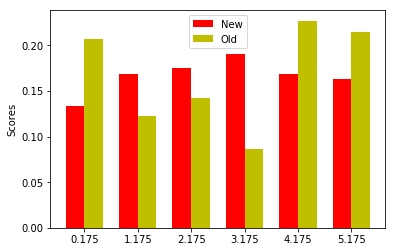

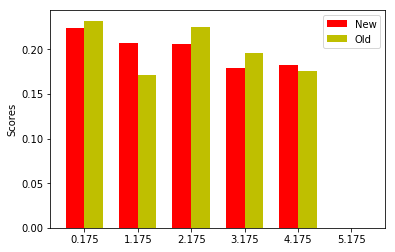

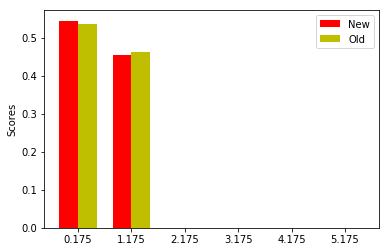

In [75]:
# ToDo подписать графики и значения на осях
for i in range(3):    
    N = 6
    new_means = probability3[:,i]

    ind = arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, new_means, width, color='r')

    old_means = probability2[:,i]
    rects2 = ax.bar(ind + width, old_means, width, color='y')

    ax.set_ylabel('Scores')
    #ax.set_title('Напруженість в світі')
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(('Відносна стабільність', 
    #                     'Холодна війна', 
    #                     'Локальні конфлікти', 
    #                     'Локальні війни'))

    ax.legend((rects1[0], rects2[0]), ('New', 'Old'))